## Here, you will bring together everything you have learned in this course while working with data recorded from the Summer Olympic games that goes as far back as 1896! This is a rich dataset that will allow you to fully apply the data manipulation techniques you have learned. You will pivot, unstack, group, slice, and reshape your data as you explore this dataset and uncover some truly fascinating insights. Enjoy!

# Case Study - Summer Olympics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
olympics = pd.read_csv('all_medalists.csv')
olympics.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


## Using .value_counts() for ranking
For this exercise, you will use the pandas Series method .value_counts() to determine the top 15 countries ranked by total number of medals.

Notice that .value_counts() sorts by values by default. The result is returned as a Series of counts indexed by unique entries from the original Series with values (counts) ranked in descending order

In [4]:
# Extract the 'NOC' column from the DataFrame olympics and assign the result to country_names. Notice that this Series has repeated entries for every medal (of any type) a country has won in any Edition of the Olympics
country_names = olympics['NOC']

In [12]:
# Create a Series medal_counts by applying .value_counts() to the Series country_names.
medal_counts = country_names.value_counts()
medal_counts

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
CAN     592
NOR     537
POL     499
DEN     491
FRG     490
KOR     466
FIN     451
YUG     435
BEL     408
CUB     395
ESP     377
SUI     376
BRA     372
BUL     331
TCH     329
       ... 
MOZ       2
TJK       2
SUR       2
LUX       2
ECU       2
SRI       2
QAT       2
ZAM       2
VIE       2
TAN       2
BER       1
CIV       1
ISV       1
KUW       1
BDI       1
GUY       1
TGA       1
MKD       1
UAE       1
SUD       1
AHO       1
IRQ       1
AFG       1
NIG       1
DJI       1
TOG       1
ERI       1
SEN       1
BAR       1
MRI       1
Name: NOC, Length: 138, dtype: int64

## Using .pivot_table() to count medals by type
Rather than ranking countries by total medals won and showing that list, you may want to see a bit more detail. You can use a pivot table to compute how many separate bronze, silver and gold medals each country won. That pivot table can then be used to repeat the previous computation to rank by total medals won.

In this exercise, you will use .pivot_table() first to aggregate the total medals by type. Then, you can use .sum() along the columns of the pivot table to produce a new column. When the modified pivot table is sorted by the total medals column, you can display the results from the last exercise with a bit more detail.

In [8]:
# Construct the pivot table: counted
counted = olympics.pivot_table(index='NOC', values='Athlete', columns='Medal', aggfunc='count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

# Sort counted by the 'totals' column
counted = counted.sort_values('totals', ascending=False)

# Print the top 15 rows of counted
counted.head(15)

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
GER,454.0,407.0,350.0,1211.0
AUS,413.0,293.0,369.0,1075.0
HUN,345.0,400.0,308.0,1053.0
SWE,325.0,347.0,349.0,1021.0


## Applying .drop_duplicates()
What could be the difference between the 'Event_gender' and 'Gender' columns? You should be able to evaluate your guess by looking at the unique values of the pairs (Event_gender, Gender) in the data. In particular, you should not see something like (Event_gender='M', Gender='Women'). However, you will see that, strangely enough, there is an observation with (Event_gender='W', Gender='Men').

The duplicates can be dropped using the .drop_duplicates() method, leaving behind the unique observations.

In [9]:
# Select columns 'Event_gender' and 'Gender' and drop duplicate pairs
olympics[['Event_gender', 'Gender']].drop_duplicates()

,Event_gender,Gender
0,M,Men
348,X,Men
416,W,Women
639,X,Women
23675,W,Men


## Finding possible errors with .groupby()
You will now use .groupby() to continue your exploration. Your job is to group by 'Event_gender' and 'Gender' and count the rows.

You will see that there is only one suspicious row: This is likely a data error.

In [10]:
olympics.groupby(['Event_gender', 'Gender']).count()

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

## Locating suspicious data
You will now inspect the suspect record by locating the offending row.

You will see that, according to the data, Joyce Chepchumba was a man that won a medal in a women's event. That is a data error as you can confirm with a web search.

In [11]:
olympics[(olympics['Event_gender'] == 'W') & (olympics['Gender'] == 'Men')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


## Using .nunique() to rank by distinct sports
You may want to know which countries won medals in the most distinct sports. The .nunique() method is the principal aggregation here. Given a categorical Series S, S.nunique() returns the number of distinct categories

__Instructions__
- Group olympics by 'NOC'.
- Compute the number of distinct sports in which each country won medals. To do this, select the 'Sport' column from your         groupby object and apply .nunique().
- Sort it in descending order with .sort_values() and ascending=False.

In [16]:
olympics.groupby('NOC')['Sport'].nunique().sort_values(ascending = False).head(15)

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64

## Counting USA vs. USSR Cold War Olympic Sports
The Olympic competitions between 1952 and 1988 took place during the height of the Cold War between the United States of America (USA) & the Union of Soviet Socialist Republics (USSR). Your goal in this exercise is to aggregate the number of distinct sports in which the USA and the USSR won medals during the Cold War years.

The construction is mostly the same as in the preceding exercise. There is an additional filtering stage beforehand in which you reduce the original DataFrame medals by extracting data from the Cold War period that applies only to the US or to the USSR. The relevant country codes in the DataFrame, which has been pre-loaded as medals, are 'USA' & 'URS'.

In [18]:
# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war
during_cold_war = (olympics.Edition>=1952) & (olympics.Edition<=1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = olympics.NOC.isin(['USA', 'URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_olympics
cold_war_olympics = olympics.loc[during_cold_war & is_usa_urs]

# Group cold_war_olympics by 'NOC'
country_grouped = cold_war_olympics.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)

# Print Nsports
Nsports

NOC
URS    21
USA    20
Name: Sport, dtype: int64

## Counting USA vs. USSR Cold War Olympic olympics
For this exercise, you want to see which country, the USA or the USSR, won the most olympics consistently over the Cold War period.

There are several steps involved in carrying out this computation.

You'll need a pivot table with years ('Edition') on the index and countries ('NOC') on the columns. The entries will be the total number of olympics each country won that year. If the country won no olympics in a given edition, expect a NaN in that entry of the pivot table.
You'll need to slice the Cold War period and subset the 'USA' and 'URS' columns.
You'll need to make a Series from this slice of the pivot table that tells which country won the most olympics in that edition using .idxmax(axis='columns'). If .max() returns the maximum value of Series or 1D array, .idxmax() returns the index of the maximizing element. The argument axis=columns or axis=1 is required because, by default, this aggregation would be done along columns for a DataFrame.
The final Series contains either 'USA' or 'URS' according to which country won the most olympics in each Olympic edition. You can use .value_counts() to count the number of occurrences of each.

In [20]:
# Create the pivot table: olympics_won_by_country
olympics_won_by_country = olympics.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')

# Slice olympics_won_by_country: cold_war_usa_urs_olympics
cold_war_usa_urs_olympics = olympics_won_by_country.loc[1952:1988, ['USA','URS']]

# Create most_olympics
most_olympics = cold_war_usa_urs_olympics.idxmax(axis='columns')

# Print most_olympics.value_counts()
most_olympics.value_counts()

URS    8
USA    2
dtype: int64

## Visualizing USA Medal Counts by Edition: Line Plot
Your job in this exercise is to visualize the medal counts by 'Edition' for the USA. The DataFrame has been pre-loaded for you as medals.

In [21]:
%matplotlib notebook

<IPython.core.display.Javascript object>


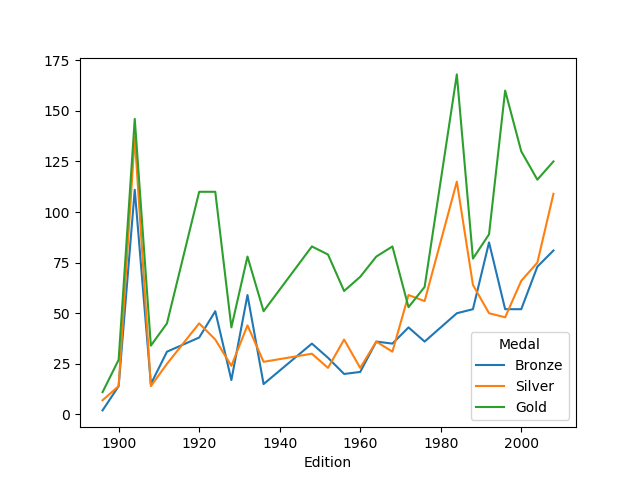

In [29]:
# Create the DataFrame: usa
usa = olympics[olympics.NOC == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_olympics_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Plot the DataFrame usa_olympics_by_year
usa_medals_by_year.plot()
plt.show()

## Visualizing USA Medal Counts by Edition: Area Plot
As in the previous exercise, your job in this exercise is to visualize the medal counts by 'Edition' for the USA. This time, you will use an area plot to see the breakdown better. The usa DataFrame has been created and all reshaping from the previous exercise has been done. You need to write the plotting command.

<IPython.core.display.Javascript object>


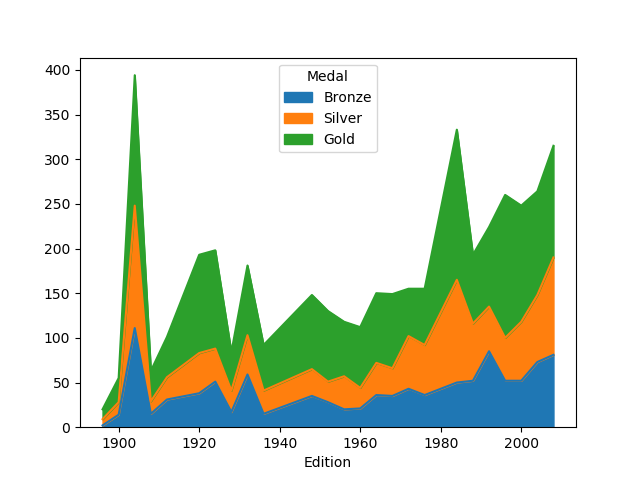

In [30]:
# Create an area plot of usa_medals_by_year. This can be done by using .plot.area().
usa_medals_by_year.plot.area()

## Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals
You may have noticed that the medals are ordered according to a lexicographic (dictionary) ordering: Bronze < Gold < Silver. However, you would prefer an ordering consistent with the Olympic rules: Bronze < Silver < Gold.

You can achieve this using Categorical types. In this final exercise, after redefining the 'Medal' column of the DataFrame medals, you will repeat the area plot from the previous exercise to see the new ordering.

<IPython.core.display.Javascript object>


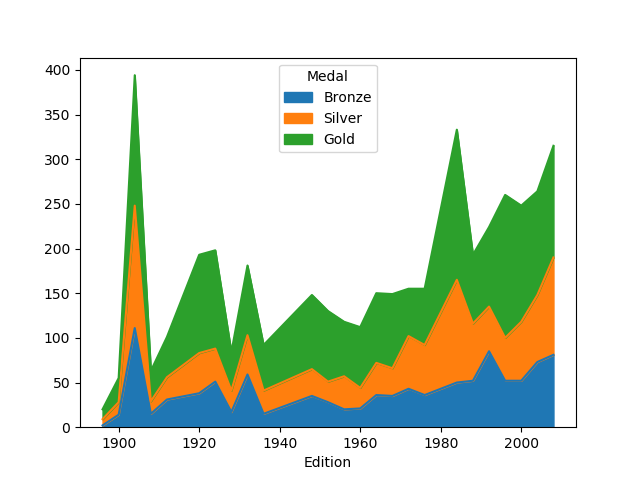

In [32]:
# Redefine 'Medal' as an ordered categorical
olympics.Medal = pd.Categorical(values=olympics.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)

# Create the DataFrame: usa
usa = olympics[olympics.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()